# GP Recipes

This notebook is horribly unoptimized. It is meant to present readible and working code and be an introduction of GP not provide fast code.

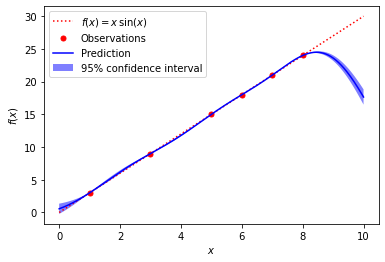

In [1]:
#GP from skikit learn

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
#RBF is squared exponential
from sklearn.gaussian_process.kernels import RBF


#Function to predict
def f(x):
    return 3*x

X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y = f(X).ravel()


x = np.atleast_2d(np.linspace(0, 10, 1000)).T

kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gp.fit(X, y)

y_pred, sigma = gp.predict(x, return_std=True)

plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()



---
---
# An implementation of https://doi.org/10.1007/s10915-017-0625-2

### Interpolation:

0.03772964371217633

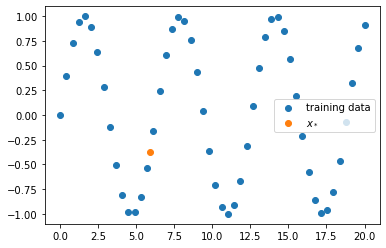

In [2]:
#Here's the data we'll try to interpolate with our homemade GP
N = 50
x = np.linspace(0,20,N)
y = np.sin(x)
plt.scatter(x,y, label='training data')

x_star = 5.9
plt.scatter(x_star, np.sin(x_star), label='$x_*$')
plt.legend();
np.mean(y)

$$K(\mathbf{x}, \mathbf{y})=K_{\mathrm{SE}}(\mathbf{x}, \mathbf{y})=\Sigma^{2} \exp \left[-\frac{(\mathbf{x}-\mathbf{y})^{2}}{2 \ell^{2}}\right]$$

In [45]:
def K_se(x,y, Σ=1, l=0.8):
    #
    #Hyperparameters:
    #Σ = 1 #for simplicity
    #l = 0.1 #shown to be optimal in FDGP paper
    return Σ**2 * np.exp(- (x-y)**2 / (2*l**2))

$$\tilde{f}_{*} \equiv \bar{f}\left(\mathbf{x}_{*}\right)+\mathbf{k}_{*}^{T} \mathbf{K}^{-1} \cdot(\mathbf{f}-\overline{\mathbf{f}}) \quad \quad (3)$$
where

$$\mathbf{f}=\left[f\left(\mathbf{x}_{1}\right), \ldots, f\left(\mathbf{x}_{N}\right)\right]^{T}$$
and
$$k_{*, i}=K\left(\mathbf{x}_{*}, x_{i}\right)$$

so I believe
$$\mathbf{k}_{*}^{T} = [K\left(\mathbf{x}_{*}, x_{1}\right), \ldots, K\left(\mathbf{x}_{*}, x_{N}\right)]$$

$$\mathbf{K} \rightarrow K_{i j} \equiv K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)$$

In [4]:
def f_star(x, y, x_star):
    N = len(x)
    #construct K
    
    K = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            K[i,j] = K_se(x[i], x[j])

    #Construct K_* and f
    K_star = np.zeros(N)
    f = np.zeros(N)
    for i in range(N):
        K_star[i] = K_se(x_star, x[i])
        f[i] = y[i]
        
    #K_* K^-1
    step1 = np.matmul(K_star, np.linalg.inv(K))
    #f - fmean
    step2 = f.T - np.ones(N)*np.mean(y)
    
    #fmean + (K_* K^-1)(f-fmean)
    f_star = np.mean(y) + np.matmul(step1, step2)
    
    return f_star

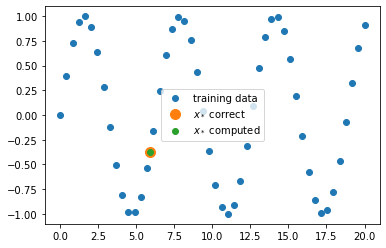

In [5]:
#Now lets plot the results
y_star = f_star(x, y, x_star) 

plt.scatter(x,y, label='training data')

plt.scatter(x_star, np.sin(x_star), label='$x_*$ correct', s = 100)
plt.scatter(x_star, y_star, label='$x_*$ computed')


plt.legend();


---
Cool! That works well. Unfortunately there are lots of things to tweak such as the hyperparameters of the kernel function. Here's an example of where this exact same thing on a differnet problem doesn't work.

# Lets try another example 
(This one will fail!)

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using this?
are we using

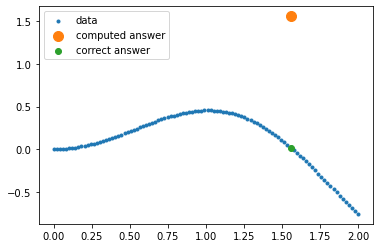

In [44]:
#exact function
def f(x):
    return x*np.sin(x)*np.cos(x)

#make discrete data
x = np.linspace(0,2,100)
y = f(x)

#correct answer
x_star = 1.56
y_star_correct = f(x_star)


#GP interpolation
y_star = f_star(x, y, x_star)

#plot results
plt.scatter(x,y,marker='.',label="data")
plt.scatter(x_star, y_star, label='computed answer', s= 100)
plt.scatter(x_star, y_star_correct, label='correct answer')
plt.legend();

Wow thats pretty bad. Lets make a class so we can easily adjust parameters and experiment.

In [17]:
class GP_interpolation:
    def __init__(self, x, y, Σ=1, l=0.8):
        
        #interpolation data
        self.x = x
        self.y = y
        self.x_star = x_star
        
        #Parameters for square exponential kernel
        self.l = l
        self.Σ = Σ
        
        
    def kernel(self, x, y):
        return self.Σ**2 * np.exp(- (x-y)**2 / (2*self.l**2))
    
    
    def fstar(self, x, y, x_star):
        N = len(x)
        #construct K

        K = np.zeros([N,N])
        for i in range(N):
            for j in range(N):
                K[i,j] = self.kernel(x[i], x[j])

        #Construct K_* and f
        K_star = np.zeros(N)
        f = np.zeros(N)
        for i in range(N):
            K_star[i] = self.kernel(x_star, x[i])
            f[i] = y[i]

        #K_* K^-1
        step1 = np.matmul(K_star, np.linalg.inv(K))
        #f - fmean
        step2 = f.T - np.ones(N)*np.mean(y)

        #fmean + (K_* K^-1)(f-fmean)
        f_star = np.mean(y) + np.matmul(step1, step2)

        return f_star
    
    def interpolate(self, x_star):
        return self.fstar(self.x, self.y, x_star)
        

# Ok, back to another example that works with the default parameters.

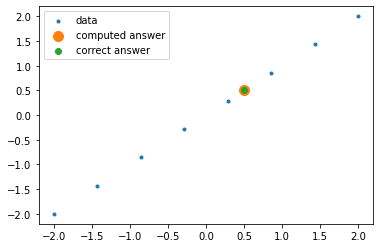

In [18]:
def f(x):
    return x

#training data
x = np.linspace(-2,2,8)
y = f(x)

#correct answer
x_star = 0.5
y_star_correct = f(x_star)

#GP interpolation
gp = GP_interpolation(x,y)
y_star = gp.interpolate(x_star)

#plot results
plt.scatter(x,y,marker='.',label="data")
plt.scatter(x_star, y_star, label='computed answer', s=100)
plt.scatter(x_star, y_star_correct, label='correct answer')
plt.legend();

Our new class works : )

Lets get back to that original problem, lets see if we can tweak $l$ and $\Sigma$ to see if we can get it to work

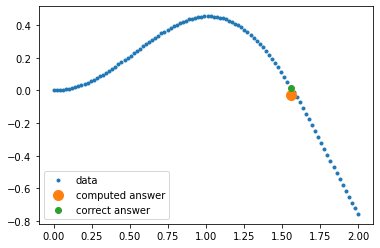

In [40]:
#exact function
def f(x):
    return x*np.sin(x)*np.cos(x)

#make discrete data
x = np.linspace(0,2,100)
y = f(x)

#correct answer
x_star = 1.56
y_star_correct = f(x_star)

#GP interpolation
gp = GP_interpolation(x,y, Σ=0.91, l = 0.1)
y_star = gp.interpolate(x_star)


#plot results
plt.scatter(x,y,marker='.',label="data")
plt.scatter(x_star, y_star, label='computed answer', s= 100)
plt.scatter(x_star, y_star_correct, label='correct answer')
plt.legend();

There was absolutley no science done here. We just adjusted $\Sigma$ and $l$ until we got something reasonably close in `gp = GP_interpolation(x,y, Σ=0.91, l = 0.1)`

I'm suprised how sensitive this is and I wonder (hope) there is a way to robustly choose a good value.

### Reconstruction

Reconstruction is where we have volume averaged integral quantities: $$\left\langle q_{i}\right\rangle=\frac{1}{\Delta \mathcal{V}_{i}} \int_{\Delta \mathcal{V}_{i}} q\left(\mathbf{x}, t^{n}\right) d \mathcal{V}$$ like in a finite volume method. Our task is to find  the flux at the interface of the cells. This is a change of data type. Going from volume to pointwise value.

This is also seen in finite difference methods. We want to find edge values given integral quantities of cells. 

FVM  - Input: $\frac{1}{\Delta \mathcal{V}_{i}} \int_{\Delta \mathcal{V}_{i}} q\left(\mathbf{x}, t^{n}\right) d \mathcal{V}$ - Output: $q\left(\mathbf{x}, t^{n}\right)$

FDM - Input: $F\left(q_{i}\right)$ - Output: $\hat{F}_{i+\frac{1}{2}}$

(Both require change of data type. Volume quantity to a discrete data point. 

Here we will modify GP interpolation to handle this "change of data types."

---
Here GP reconstruction is defined. On a stensil that takes p points from behind and r points from the front.
$$G_{k} \equiv \int f(\mathbf{x}) d g_{k}(\mathbf{x}), k=i-p, \ldots, i+r$$
where $$d g_{k}(\mathbf{x}), k=i-p, \ldots, i+r$$

and 
$$d g_{k}(\mathbf{x})=\left\{\begin{array}{ll}d^{3} \mathbf{x} \times \prod_{d=x, y, z} \frac{1}{\Delta^{(d)}} & \text { if } \mathbf{x} \in I_{k} \\ 0 & \text { if } \mathbf{x} \notin I_{k}\end{array}\right.$$

$\Delta^{(d)}$ is just dx, but in the directions. Theoretically, dx could be different than dy

So, the pointwise function value $f\left(\mathbf{x}_{*}\right)$ reconstructed from volume average data $G$ is given by:

$$\tilde{f}_{*}=\bar{f}\left(\mathbf{x}_{*}\right)+\mathbf{T}_{*}^{T} \mathbf{C}^{-1}(\mathbf{G}-\overline{\mathbf{G}})$$

In [41]:
from scipy.special import erf
from numpy import sqrt, exp, pi

def getC(x_k, x_h, Δ): #Equation 22.
    l=0.1
    Δkh = (x_k - x_h)/Δ
    
    
    Ckh = sqrt(pi)* (l/Δ)**2 * (
    
    ( (Δkh + 1)/(sqrt(2)*l/Δ) * erf( (Δkh + 1)/(sqrt(2)*l/Δ) ) 
    + (Δkh - 1)/(sqrt(2)*l/Δ) * erf((Δkh - 1)/(sqrt(2)*l/Δ)) )
    
    + 1/sqrt(pi) * ( exp( - (Δkh + 1)**2 / (2 * (l/Δ)**2 ) ) 
    + exp( - (Δkh - 1)**2 / (2 * (l/Δ)**2 ) ) )
    
    -2 * ( Δkh/(sqrt(2)*l/Δ ) * erf( Δkh/(sqrt(2)*l/Δ) )
    + 1/sqrt(pi) * exp( -Δkh**2/(2*(l/Δ)**2) ) ) )
    
    return Ckh


def getT(x_χ, x_k, Δ): #Equation 23
    #χ = * in paper
    l=0.1
    Δχk = (x_χ - x_k)/Δ
    
    T_χk = sqrt(pi/2) * (l/Δ) * (
    erf( (Δχk + 0.5) / (sqrt(2)*l/Δ) )
    - erf( (Δχk - 0.5) / (sqrt(2)*l/Δ) ) )
    
    return T_χk

1 D constant mean, $x_* = x_{i \pm \frac{1}{2}}$ eq. 20

$$\overline{\mathbf{G}}=f_{0} \mathbf{1}_{r+p+1} $$
$$\tilde{f}_{i \pm \frac{1}{2}}=f_{0}+\mathbf{T}_{i \pm \frac{1}{2}}^{T} \mathbf{C}^{-1}\left(\mathbf{G}-f_{0} \mathbf{1}_{r+p+1}\right)$$

In [50]:
#1D reconstruction....

def f_star_reconstruction_1d(x, y, i, p=2, r=2):
    #i index of x[i]. We compute x[i ± 0.5]
    #p is points below
    #r is points above
    #eq 20
    
    ################# x_i +1/2##############################
    N = p+r+1 
    dx = (x[-1] - x[0])/(len(x)-1)
    f0 = np.mean(y)
    
    T = np.zeros(N)
    for ii in range(i-p, i+r+1):
        T[ii - (i-p)] = getT(x[i]+0.5*dx, x[ii], dx)
    
    C = np.zeros([N,N])
    for ii in range(i-p, i+r+1):
        for jj in range(i-p, i+r+1):
            C[ii - (i-p), jj - (i-p)] = getT(x[ii], x[jj], dx)
            
    G = y[i-p-1:i+r]
    Gbar = np.mean(G)*np.ones(N)
    
    
    z = np.matmul(T.T, np.linalg.inv(C))
    
    _G = G-Gbar  
    
    f_x_plus_half = f0 + np.dot(z, _G)
    
        
    ################# x_i - 1/2##############################
    N = p+r+1 
    dx = (x[-1] - x[0])/(len(x)-1)
    f0 = np.mean(y)
    
    T = np.zeros(N)
    for ii in range(i-p, i+r+1):
        T[ii - (i-p)] = getT(x[i]-0.5*dx, x[ii], dx)
    
    C = np.zeros([N,N])
    for ii in range(i-p, i+r+1):
        for jj in range(i-p, i+r+1):
            C[ii - (i-p), jj - (i-p)] = getT(x[ii], x[jj], dx)
            
    G = y[i-p-1:i+r]
    Gbar = np.mean(G)*np.ones(N)

    
    z = np.matmul(T.T, np.linalg.inv(C))
    
    _G = G-Gbar  
    
    f_x_minus_half = f0 + np.dot(z, _G)
    
    return f_x_plus_half, f_x_minus_half

### The only change we made between equation 20 in the paper is we do not assume constant mean i.e.
$$\overline{\mathbf{G}}=f_{0} \mathbf{1}_{r+p+1} \quad \quad (eq. 19)$$

#### It's super easy to just calculate $\bar{G}$ so we do that + its more accucrate.

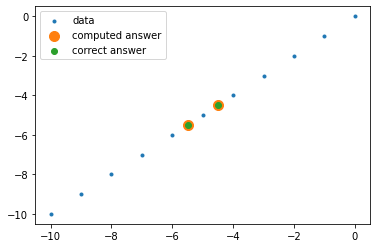

In [52]:
def f(x):
    return x

#training data
x = np.linspace(-10,0,11)
y = f(x)
dx = (x[-1] - x[0])/(len(x)-1)

x_i = 5
x_i_plus = x[x_i] + 0.5*dx
x_i_minus = x[x_i] - 0.5*dx

#solution 
y_i_plus  = f(x_i_plus)
y_i_minus = f(x_i_minus)

#gaussian process reconstruction
numy_i_plus, numy_i_minus = f_star_reconstruction_1d(x,y, x_i)


#plot results
plt.scatter(x,y,marker='.',label="data")
plt.scatter([x_i_plus, x_i_minus], [numy_i_plus, numy_i_minus], s=100, label='computed answer')
plt.scatter([x_i_plus, x_i_minus], [y_i_plus, y_i_minus], label='correct answer')
plt.legend();